In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import  pyplot as plt

In [2]:
with pm.Model() as model:
    parameter = pm.Exponential("poisson_param", 1)
    data_generator = pm.Poisson("data_generator", parameter)

In [3]:
with model:
    data_plus_one = data_generator + 1

In [4]:
parameter.tag.test_value

array(0.6931471824645996)

In [5]:
parameter.tag.test_value, data_generator.tag.test_value, data_plus_one.tag.test_value

(array(0.6931471824645996), 0, array(1))

In [6]:
with pm.Model() as model:
    parameter = pm.Exponential("poisson_param", 1, testval=0.5)

parameter.tag.test_value

array(0.5)

In [2]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1)
    lambda_2 = pm.Exponential("lambda_2", 1)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

new_deterministic_variable = lambda_1 + lambda_2
new_deterministic_variable

Elemwise{add,no_inplace}.0

In [10]:
def subtract(x,y):
    return x - y

with model:
    stochastic_1 = pm.Uniform("U_1", 0, 1)
    stochastic_2 = pm.Uniform("U_2", 0, 1)

    det_1 = pm.Deterministic("Delta", subtract(stochastic_1, stochastic_2))
det_1

Delta

In [11]:
import theano.tensor as tt

with pm.Model() as theano_test:
    p1 = pm.Uniform("p", 0, 1)
    p2 = 1 - p1
    p = tt.stack([p1, p2])
    
    assignment = pm.Categorical("assignment", p)
assignment

assignment

(0, 8)

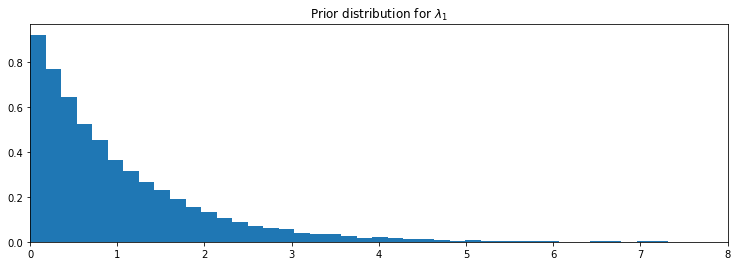

In [6]:
import scipy.stats as stats
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0,8)

In [7]:
data = np.array([10, 5])
with model:
    fixed_variable = pm.Poisson("fxd", 1, observed=data)
fixed_variable.tag.test_value

array([10,  5])